In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/2w/qbnd7l8n5vq7kdc34_tys6040000gn/T/ipykernel_7028/1492400551.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [11]:
df1 = pd.read_csv('../output/0_housholds_data_dynamic.csv')
df1['period'] = 1
df2 = pd.read_csv('../output/1_housholds_data_dynamic.csv')
df2['period'] = 2
df3 = pd.read_csv('../output/2_housholds_data_dynamic.csv')
df3['period'] = 3
df4 = pd.read_csv('../output/3_housholds_data_dynamic.csv')
df4['period'] = 4
df5 = pd.read_csv('../output/4_housholds_data_dynamic.csv')
df5['period'] = 5
df6 = pd.read_csv('../output/5_housholds_data_dynamic.csv')
df6['period'] = 6
df7 = pd.read_csv('../output/6_housholds_data_dynamic.csv')
df7['period'] = 7
df8 = pd.read_csv('../output/7_housholds_data_dynamic.csv')
df8['period'] = 8
df9 = pd.read_csv('../output/8_housholds_data_dynamic.csv')
df9['period'] = 9
df10 = pd.read_csv('../output/9_housholds_data_dynamic.csv')
df10['period'] = 10
df11 = pd.read_csv('../output/10_housholds_data_dynamic.csv')
df11['period'] = 11
df12 = pd.read_csv('../output/11_housholds_data_dynamic.csv')
df12['period'] = 12


df_list = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12]


In [12]:
df_final = pd.concat(df_list)
df_final.head(5)

,x,y,index1,income,high_income,hh_propensity,a,utility,max_fs_prop,healthy_choice,unhealthy_choice,period
0,136387.5,459037.5,0,42.312275,1,0.526994,0.000098,24.521422,0.227045,1.0,0.0,1
1,136787.5,459012.5,1,34.591298,0,0.657500,-0.000013,2.133578,0.227045,1.0,0.0,1
2,136812.5,459012.5,2,62.207712,1,1.274915,-0.000047,1.692383,0.227045,1.0,0.0,1
3,136512.5,458987.5,3,35.379079,0,0.330035,0.000006,1.901385,0.227045,1.0,0.0,1
4,136487.5,458962.5,4,38.996098,1,1.154417,-0.000023,2.082264,0.227045,1.0,0.0,1


In [13]:
df_final['healthy_choice_share'] = df_final['healthy_choice'] / 12
df_final['unhealthy_choice_share'] = df_final['unhealthy_choice'] / 12

In [15]:
df = df_final.copy()

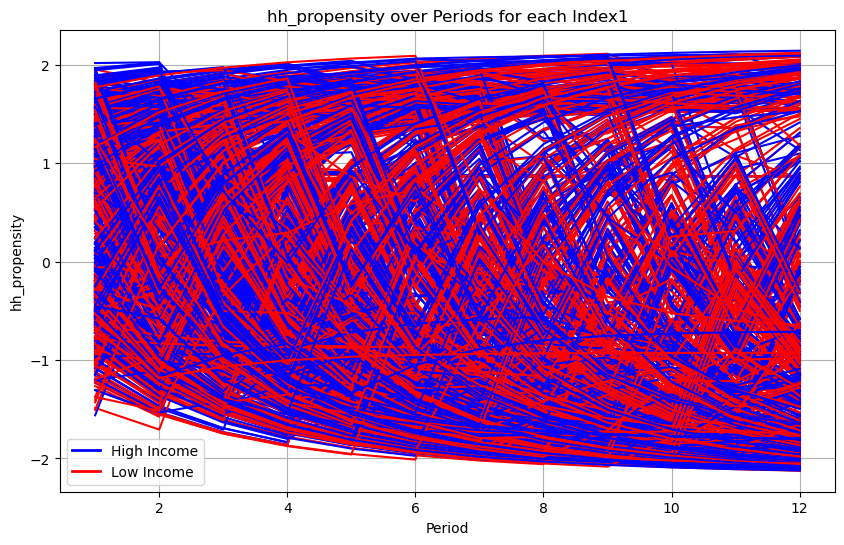

In [9]:
plt.figure(figsize=(10, 6))

for index1, group in df.groupby('index1'):

    color = 'blue' if group['high_income'].iloc[0] == 1 else 'red'
    plt.plot(group['period'], group['hh_propensity'], color=color)

legend_labels = {1: 'High Income', 0: 'Low Income'}
legend_handles = [plt.Line2D([0], [0], color='blue', lw=2, label=legend_labels[1]),
                  plt.Line2D([0], [0], color='red', lw=2, label=legend_labels[0])]

plt.legend(handles=legend_handles)

plt.title('hh_propensity over Periods for each Index1')
plt.xlabel('Period')
plt.ylabel('hh_propensity')
plt.grid(True)
plt.show()

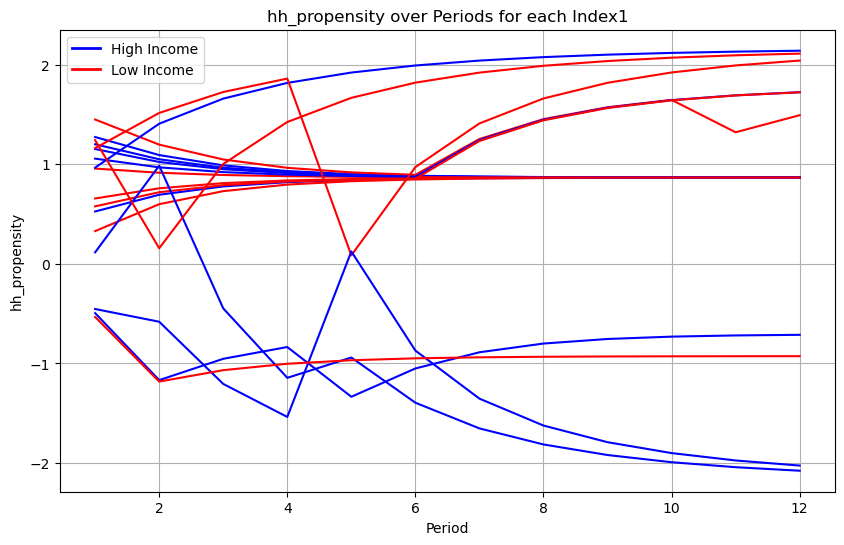

In [5]:
plt.figure(figsize=(10, 6))

for index1, group in df.groupby('index1'):
    if index1 < 10 or index1 > 955:
        color = 'blue' if group['high_income'].iloc[0] == 1 else 'red'
        plt.plot(group['period'], group['hh_propensity'], color=color)

legend_labels = {1: 'High Income', 0: 'Low Income'}
legend_handles = [plt.Line2D([0], [0], color='blue', lw=2, label=legend_labels[1]),
                  plt.Line2D([0], [0], color='red', lw=2, label=legend_labels[0])]

plt.legend(handles=legend_handles)

plt.title('hh_propensity over Periods for each Index1')
plt.xlabel('Period')
plt.ylabel('hh_propensity')
plt.grid(True)
plt.show()

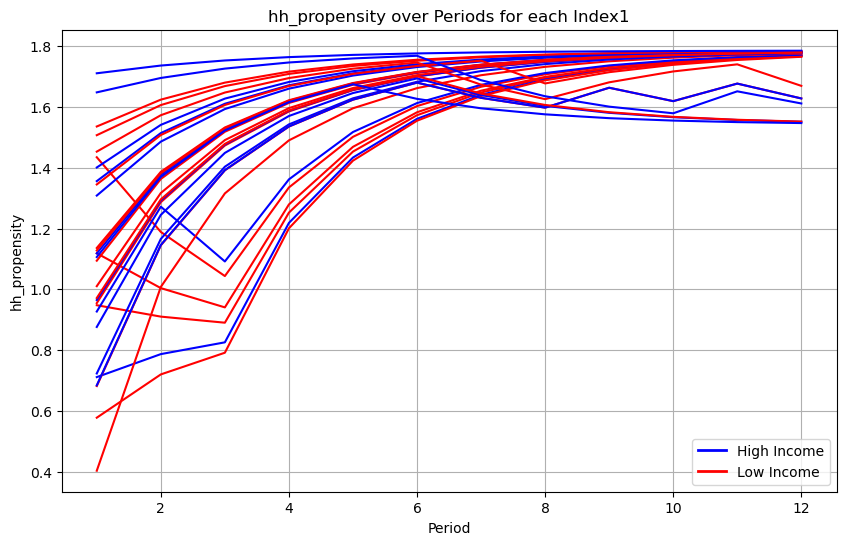

In [6]:
plt.figure(figsize=(10, 6))

for index1, group in df.groupby('index1'):
    if index1 > 10 and index1 < 40:
        color = 'blue' if group['high_income'].iloc[0] == 1 else 'red'
        plt.plot(group['period'], group['hh_propensity'], color=color)

legend_labels = {1: 'High Income', 0: 'Low Income'}
legend_handles = [plt.Line2D([0], [0], color='blue', lw=2, label=legend_labels[1]),
                  plt.Line2D([0], [0], color='red', lw=2, label=legend_labels[0])]

plt.legend(handles=legend_handles)

plt.title('hh_propensity over Periods for each Index1')
plt.xlabel('Period')
plt.ylabel('hh_propensity')
plt.grid(True)
plt.show()

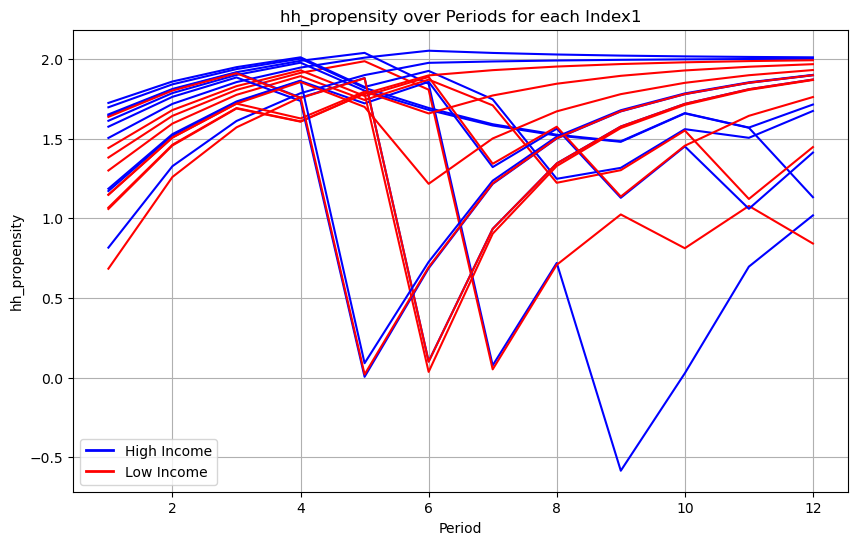

In [8]:
plt.figure(figsize=(10, 6))

for index1, group in df.groupby('index1'):
    if index1 > 100 and index1 < 120:
        color = 'blue' if group['high_income'].iloc[0] == 1 else 'red'
        plt.plot(group['period'], group['hh_propensity'], color=color)

legend_labels = {1: 'High Income', 0: 'Low Income'}
legend_handles = [plt.Line2D([0], [0], color='blue', lw=2, label=legend_labels[1]),
                  plt.Line2D([0], [0], color='red', lw=2, label=legend_labels[0])]

plt.legend(handles=legend_handles)

plt.title('hh_propensity over Periods for each Index1')
plt.xlabel('Period')
plt.ylabel('hh_propensity')
plt.grid(True)
plt.show()

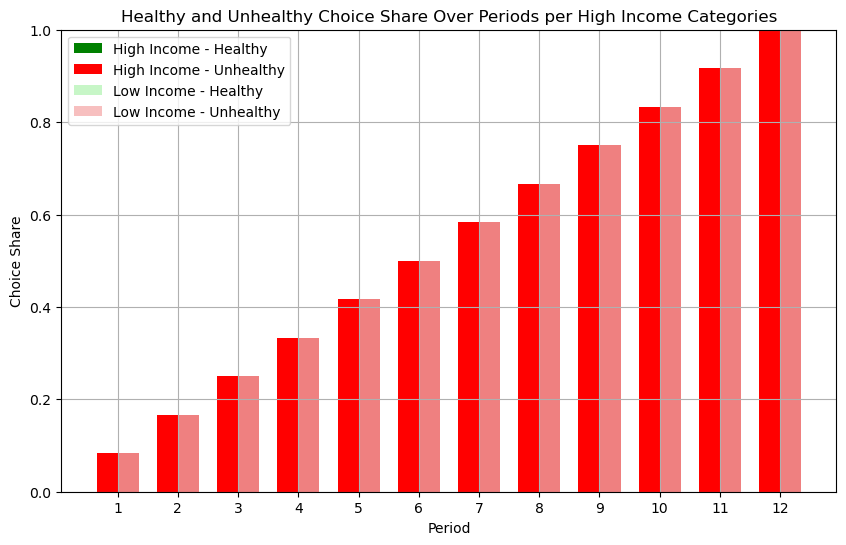

In [17]:
high_income_df = df[df['high_income'] == 1]
low_income_df = df[df['high_income'] == 0]

# Create bar chart for healthy choice share and unhealthy choice share over periods
plt.figure(figsize=(10, 6))

bar_width = 0.35
periods = df['period'].unique()

# Create index arrays for high_income and low_income DataFrames
high_income_index = high_income_df['period'].values - bar_width / 2
low_income_index = low_income_df['period'].values + bar_width / 2

# Plot bars for high income
plt.bar(high_income_index, high_income_df['healthy_choice_share'], bar_width, label='High Income - Healthy', color='green')
plt.bar(high_income_index, high_income_df['unhealthy_choice_share'], bar_width, bottom=high_income_df['healthy_choice_share'], label='High Income - Unhealthy', color='red')

# Plot bars for low income
plt.bar(low_income_index, low_income_df['healthy_choice_share'], bar_width, label='Low Income - Healthy', color='lightgreen', alpha=0.5)
plt.bar(low_income_index, low_income_df['unhealthy_choice_share'], bar_width, bottom=low_income_df['healthy_choice_share'], label='Low Income - Unhealthy', color='lightcoral', alpha=0.5)

plt.title('Healthy and Unhealthy Choice Share Over Periods per High Income Categories')
plt.xlabel('Period')
plt.ylabel('Choice Share')
plt.xticks(periods)
plt.legend()
plt.grid(True)